In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings

In [79]:
from google.colab import files
import pandas as pd

upload = files.upload()
df = pd.read_csv('car_price_prediction.csv')

Saving car_price_prediction.csv to car_price_prediction (2).csv


In [80]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [81]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [82]:
df.shape

(19237, 18)

In [83]:
df.drop_duplicates(keep=False,inplace=True)

In [84]:
df['Turbo'] = df['Engine volume'].str.contains('Turbo').astype(int)

df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')
df['Engine volume'] = df['Engine volume'].astype(float)
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [85]:
df['Mileage'] = df['Mileage'].astype(str).str.replace(' km', '')
df['Mileage'] = df['Mileage'].astype(float)
df['Mileage']

,Mileage
0,186005.0
2,200000.0
3,168966.0
4,91901.0
5,160931.0
...,...
19232,300000.0
19233,161600.0
19234,116365.0
19235,51258.0


In [86]:
def clean_doors(value):
    value = str(value)
    if '4' in value:
        return 4
    elif '2' in value:
        return 2
    else:
        return 6

df['Doors'] = df['Doors'].apply(clean_doors)
df['Doors']

,Doors
0,4
2,4
3,4
4,4
5,4
...,...
19232,2
19233,4
19234,4
19235,4


In [87]:
df['Car Age']=2025-df['Prod. year']
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Car Age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0,15
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0,19
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0,14
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0,11
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,4,Left wheel,White,4,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5,1,26
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8,0,14
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4,0,15
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4,0,18


In [88]:
values_to_replace=['',' ','-']
df['Levy'].replace(values_to_replace,np.nan,inplace=True)
df['Levy']=df['Levy'].astype(float)
df['Levy'].fillna(df['Levy'].mean(),inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 18704 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18704 non-null  int64  
 1   Price             18704 non-null  int64  
 2   Levy              18704 non-null  float64
 3   Manufacturer      18704 non-null  object 
 4   Model             18704 non-null  object 
 5   Prod. year        18704 non-null  int64  
 6   Category          18704 non-null  object 
 7   Leather interior  18704 non-null  object 
 8   Fuel type         18704 non-null  object 
 9   Engine volume     18704 non-null  float64
 10  Mileage           18704 non-null  float64
 11  Cylinders         18704 non-null  float64
 12  Gear box type     18704 non-null  object 
 13  Drive wheels      18704 non-null  object 
 14  Doors             18704 non-null  int64  
 15  Wheel             18704 non-null  object 
 16  Color             18704 non-null  object 
 17

/tmp/ipython-input-3962290526.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace(values_to_replace,np.nan,inplace=True)
/tmp/ipython-input-3962290526.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Car Age
0,45654403,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0,15
2,45774419,8467,906.247683,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0,19
3,45769185,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0,14
4,45809263,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0,11
5,45802912,39493,891.000000,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,4,Left wheel,White,4,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906.247683,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5,1,26
19233,45778856,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8,0,14
19234,45804997,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4,0,15
19235,45793526,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4,0,18


In [89]:
df.nunique()

,0
ID,18704
Price,2300
Levy,559
Manufacturer,65
Model,1579
Prod. year,53
Category,11
Leather interior,2
Fuel type,7
Engine volume,65


In [90]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['Price', 'Mileage', 'Engine volume', 'Levy']:
    df = remove_outliers_iqr(df, col)

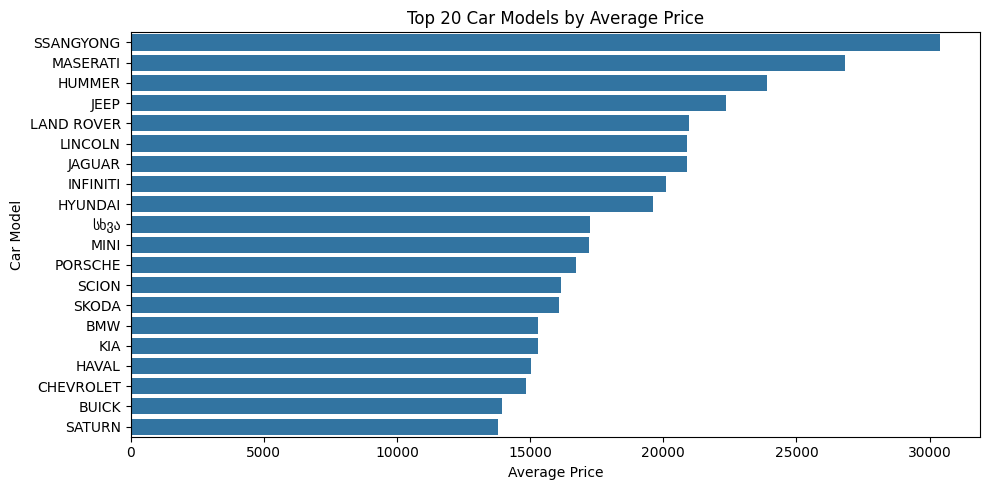

In [91]:
avg_prices_by_car = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
top_car_models = avg_prices_by_car.head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top 20 Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

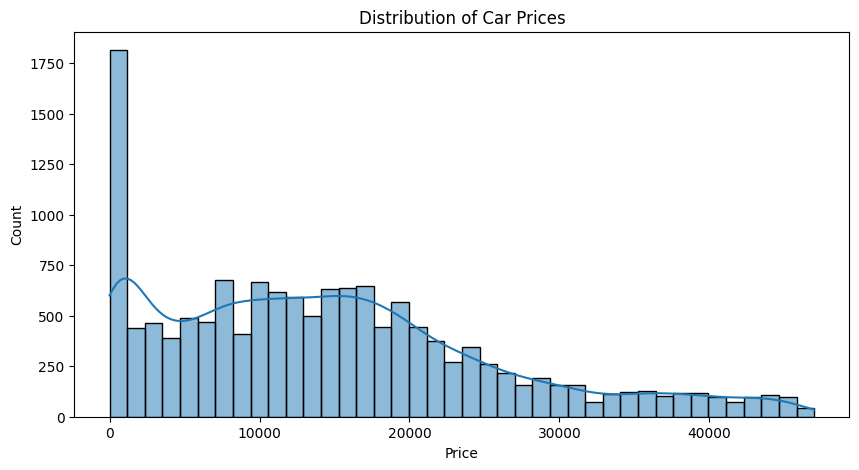

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

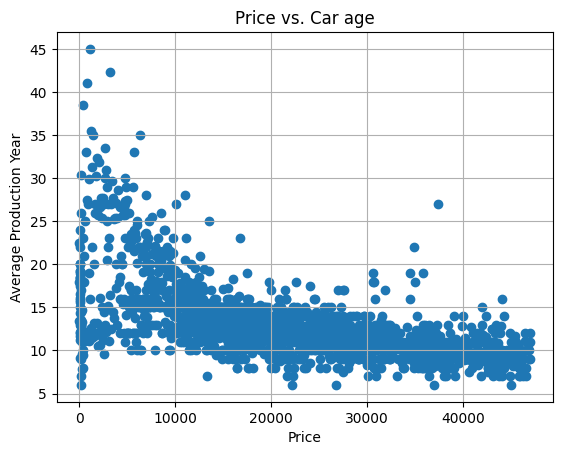

In [22]:
grouped = df.groupby('Price')['Car age'].mean()
plt.scatter(grouped.index, grouped.values)
plt.title("Price vs. Car age")
plt.xlabel('Price')
plt.ylabel('Average Production Year')
plt.grid()

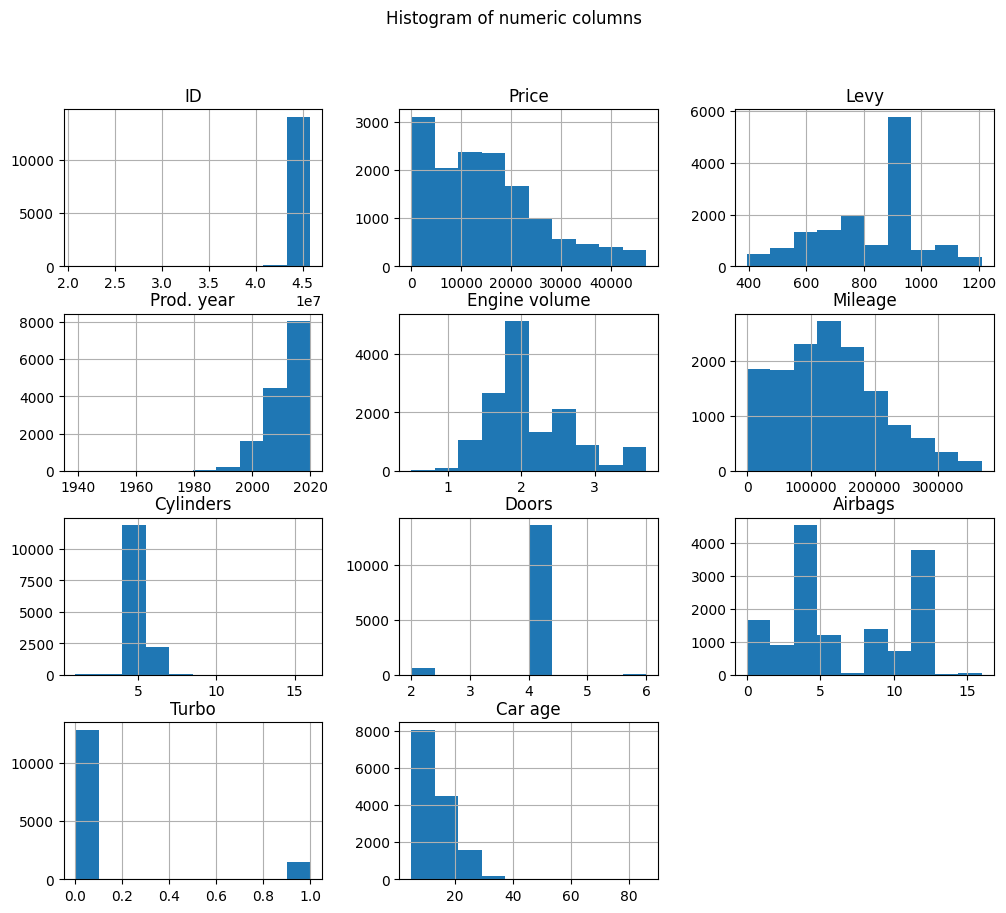

In [17]:
df.hist(figsize=(12,10))
plt.suptitle("Histogram of numeric columns")
plt.show()

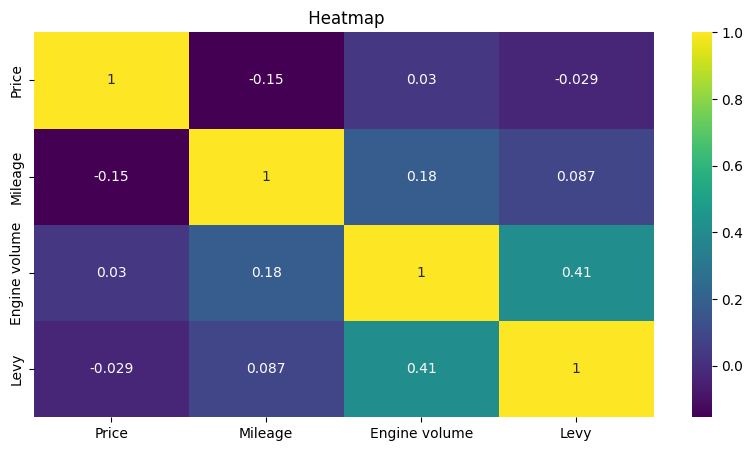

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Price','Mileage','Engine volume','Levy']].corr(), annot=True, cmap='viridis')
plt.title(' Heatmap')
plt.show()

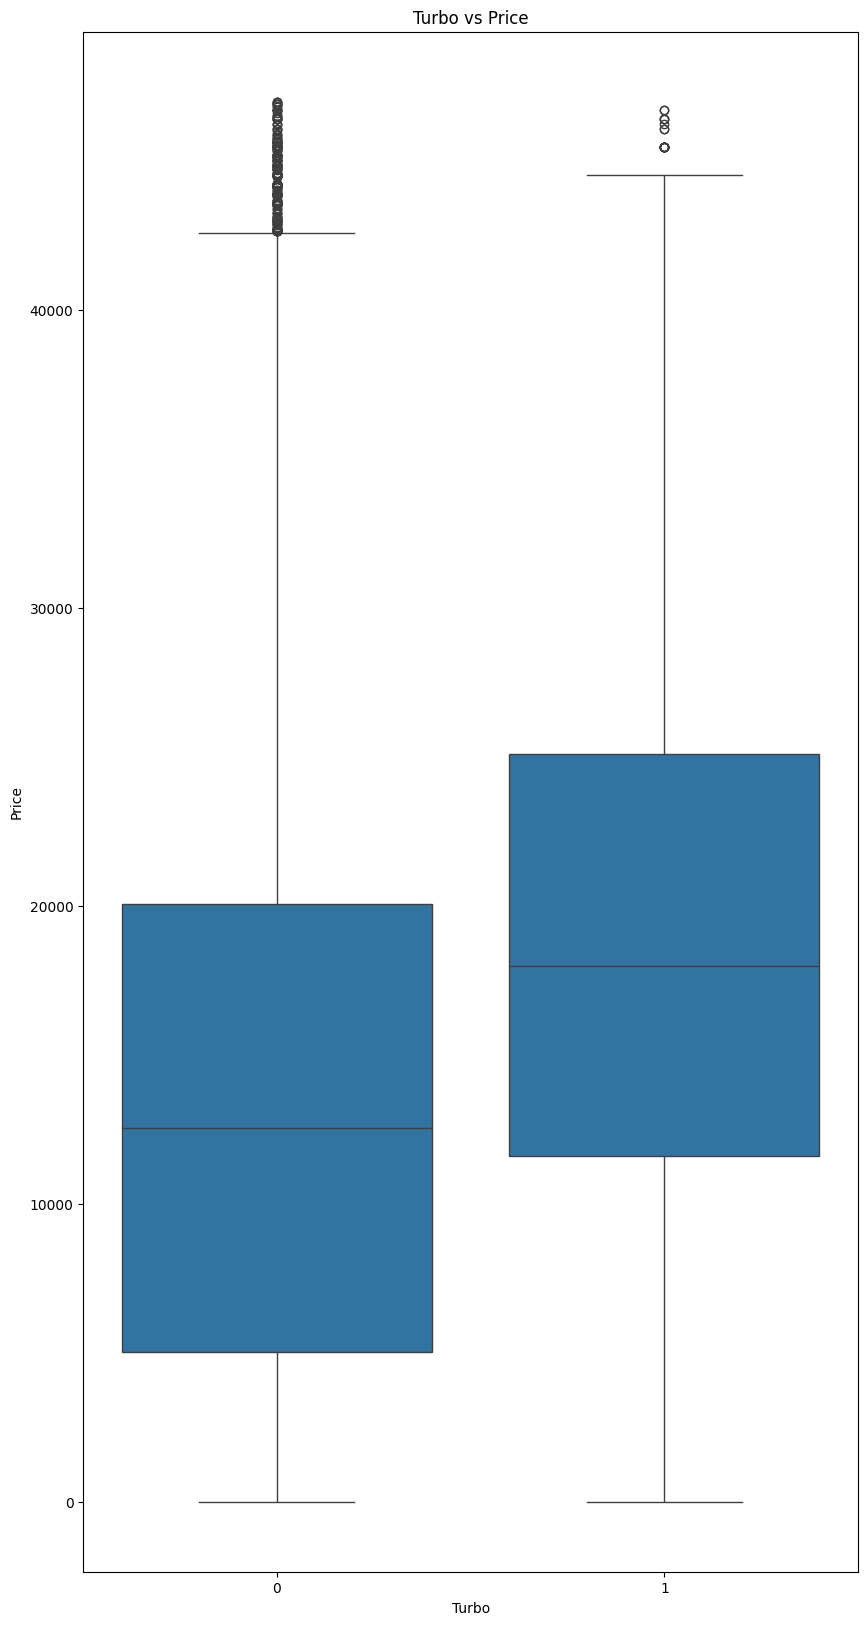

In [20]:
plt.figure(figsize=(10,20))
sns.boxplot(x='Turbo', y='Price', data=df)
plt.title('Turbo vs Price')
plt.show()

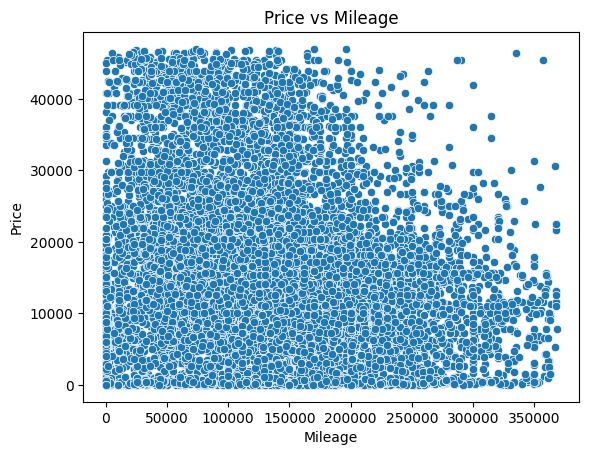

In [21]:
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Price vs Mileage')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo', 'Car Age'],
      dtype='object')


In [97]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
                    'Fuel type', 'Gear box type', 'Drive wheels', 'Doors',
                    'Wheel', 'Color']
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

In [98]:
X = df.drop(['Price', 'ID'], axis=1)
y = df['Price']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [ ]:
print("Decision Tree Regressor:")
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R2 Score:", r2_score(y_test, predictions))

Decision Tree Regressor:
MAE: 4167.513558483019
MSE: 53100779.46581631
RMSE: 7287.028164198098
R2 Score: 0.5723466665885645


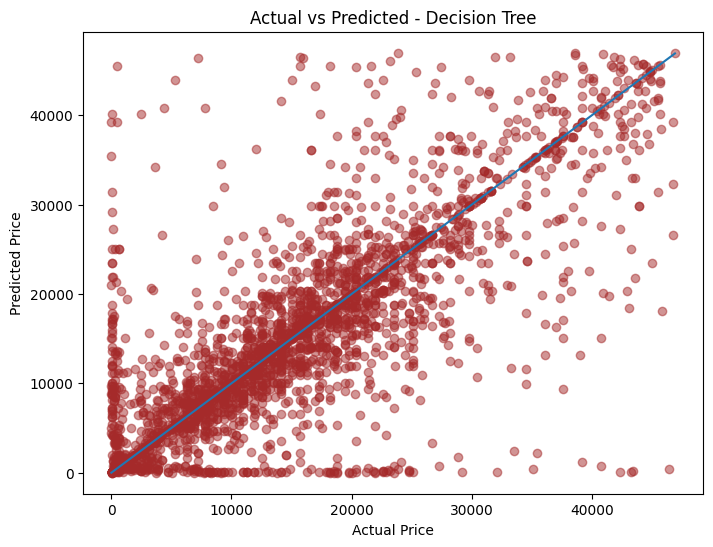

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5, color='brown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Decision Tree")
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [ ]:
print("\nRandom Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_ppredreds)))
print("R2 Score:", r2_score(y_test, pred))


Random Forest Regressor:
MAE: 3201.7331002718724
MSE: 27299815.558297865
RMSE: 5224.922540889756
R2 Score: 0.7801377448227638


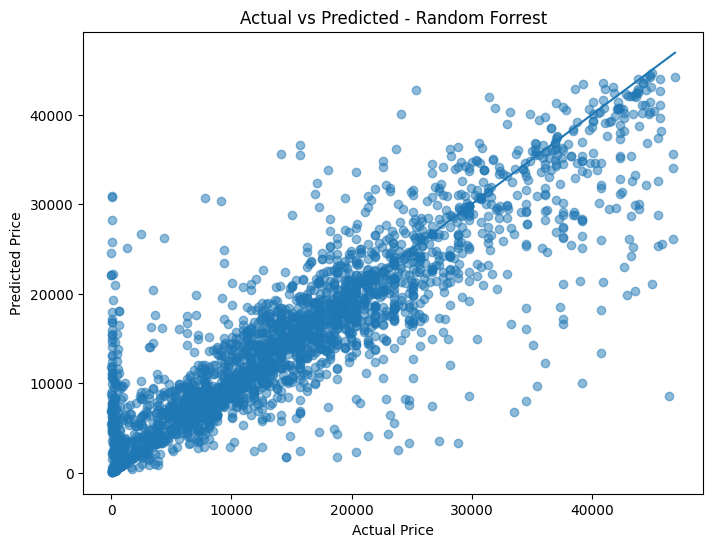

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Random Forrest")
plt.show()


In [ ]:
results = pd.DataFrame({'Actual Price': y_test,     'Decision Tree Prediction': preds,     'Random Forest Prediction': pred})
results.to_csv('car_price_model_predictions.csv', index=False)
print("\nPredictions saved as 'car_price_model_predictions.csv'")


Predictions saved as 'car_price_model_predictions.csv'


JUST FOR TESTING :

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)


lm_preds = lm.predict(X_test)


print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, lm_preds))
print("MSE:", mean_squared_error(y_test, lm_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lm_preds)))
print("R2 Score:", r2_score(y_test, lm_preds))

Linear Regression:
MAE: 7577.249490060546
MSE: 95430908.36415544
RMSE: 9768.87446762192
R2 Score: 0.2314360263075862
